In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import SchusterResonatorSmooth
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

## Calibration for 20240514-SiRes-12pHsq-v1.gds

In [6]:
def calibration_resonator(CapacitorHorizontalLength, 
                            CapacitorVerticalLength, 
                            CapacitorWidth,
                            NumberOfBends, 
                            InductorVerticalLength,
                            InductorHorizontalLength,
                            InductorWidth,
                            InductorEndLength,
                            TaperWidth,
                            TaperLength,
                            SpacingC0, 
                            SpacingCc):
    
    #Layers
    ls = LayerSet()
    ls.add_layer('Etch', gds_layer=0, color = 'red')
    ls.add_layer('Cap', gds_layer=1, color = 'blue')
    ls.add_layer('Ind', gds_layer=2, color = 'grey')

    #Shapes
    Resonator, Etch, Dcap, Dind, Droute = SchusterResonatorSmooth(CapacitorHorizontalLength, 
                                                  CapacitorVerticalLength, 
                                                  CapacitorWidth,
                                                  NumberOfBends, 
                                                  InductorVerticalLength,
                                                  InductorHorizontalLength,
                                                  InductorWidth,
                                                  InductorEndLength,
                                                  TaperWidth,
                                                  TaperLength,
                                                  SpacingC0, 
                                                  SpacingCc,
                                                  calib = True)
    
    #Final devices
    FinalDevice = Device('FinalDevice')
    FinalDevice.add_polygon(Dcap.get_polygons(), layer = ls['Cap'])
    FinalDevice.add_polygon(Dind.get_polygons(), layer = ls['Ind'])
    FinalDevice.add_polygon(Droute.get_polygons(), layer = ls['Cap'])
    FinalDevice.add_polygon(Etch.get_polygons(), layer = ls['Etch'])
    return FinalDevice

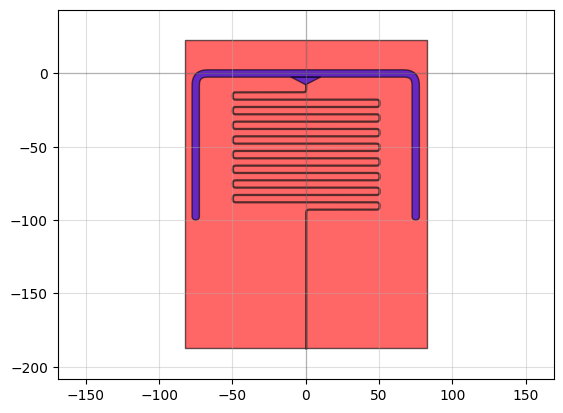

'20240514-SiRes-12pHsq-v1-calib.gds'

In [7]:
Lk_12 = 12e-12 

ls = LayerSet()
ls.add_layer('Ground', gds_layer=0, color = 'red')
ls.add_layer('Metal', gds_layer=1, color = 'blue')
CapacitorHorizontalLength12 = 150
CapacitorVerticalLength12 = 100
CapacitorWidth12 = 5

NumberOfBends12 = 14
InductorVerticalLength12 = 5
InductorHorizontalLength12 = 100
InductorEndLength12 = 90
InductorTotalLength12 = InductorVerticalLength12*(NumberOfBends12+4) + InductorEndLength12 +InductorHorizontalLength12*NumberOfBends12
InductorWidth12 = 0.6
TaperWidth12 = 20

SpacingC012 = 5
SpacingCc12 = 20
TaperLength12 = 5

CalibrationDevice = calibration_resonator(CapacitorHorizontalLength12, 
                                            CapacitorVerticalLength12, 
                                            CapacitorWidth12,
                                            NumberOfBends12, 
                                            InductorVerticalLength12,
                                            InductorHorizontalLength12,
                                            InductorWidth12,
                                            InductorEndLength12,
                                            TaperWidth12,
                                            TaperLength12,
                                            SpacingC012, 
                                            SpacingCc12)

qp(CalibrationDevice)
CalibrationDevice.write_gds('20240514-SiRes-12pHsq-v1-calib.gds')